In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import numpy_financial as npf

In [2]:
# 排序函数

#  sort函数返回排序后的数组；
#  lexsort函数根据键值的字典序进行排序；
#  argsort函数返回输入数组排序后的下标；
#  ndarray类的sort方法可对数组进行原地排序；
#  msort函数沿着第一个轴排序；
#  sort_complex函数对复数按照先实部后虚部的顺序进行排序

# 按字典序排序
def datestr2num(s): 
    return datetime.datetime.strptime (s.decode('ascii'), "%Y-%m-%d").toordinal() 
dates,closes=np.loadtxt('apple.csv', delimiter=',', 
                        usecols=(0,4), converters={0:datestr2num}, unpack=True, skiprows=1)
dates = dates[:30]
closes = closes[:30]
print(closes)

# 按照收盘价排序
indices = np.lexsort((dates, closes))
print(indices)
print(["%s %s" % (datetime.date.fromordinal(int(dates[i])), closes[i]) for i in indices])

[214.01  214.38  210.97  210.58  211.98  210.11  207.72  210.65  209.43
 205.93  215.04  211.725 208.072 197.75  203.075 205.94  207.884 199.29
 192.063 194.73  195.86  199.23  192.05  195.46  194.12  196.19  195.116
 198.67  200.38  203.4  ]
[22 18 24 19 26 23 20 25 13 27 21 17 28 14 29  9 15  6 16 12  8  5  3  7
  2 11  4  0  1 10]
['2010-02-04 192.05', '2010-01-29 192.063', '2010-02-08 194.12', '2010-02-01 194.73', '2010-02-10 195.116', '2010-02-05 195.46', '2010-02-02 195.86', '2010-02-09 196.19', '2010-01-22 197.75', '2010-02-11 198.67', '2010-02-03 199.23', '2010-01-28 199.29', '2010-02-12 200.38', '2010-01-25 203.075', '2010-02-16 203.4', '2010-01-15 205.93', '2010-01-26 205.94', '2010-01-12 207.72', '2010-01-27 207.884', '2010-01-21 208.072', '2010-01-14 209.43', '2010-01-11 210.11', '2010-01-07 210.58', '2010-01-13 210.65', '2010-01-06 210.97', '2010-01-20 211.725', '2010-01-08 211.98', '2010-01-04 214.01', '2010-01-05 214.38', '2010-01-19 215.04']


In [3]:
# 复数
# 对复数进行排序
np.random.seed(53)
complex_numbers = np.random.random(5) + 1j * np.random.random(5)
# 调用sort_complex函数对上面生成的复数进行排序
np.sort_complex(complex_numbers)

array([0.35217491+0.47837906j, 0.4548754 +0.2645422j ,
       0.56116554+0.82745628j, 0.58585138+0.34778502j,
       0.84666241+0.53574974j])

In [4]:
# argmax函数返回数组中最大值对应的下标
a = np.array([2, 4, 8])
np.argmax(a)

2

In [5]:
# nanargmax函数提供相同的功能，但忽略NaN值
a = np.array([np.nan, 2, 4])
np.nanargmax(a)

2

In [6]:
# argmin和nanargmin函数的功能类似，只不过换成了最小值
# argwhere函数根据条件搜索非零的元素，并分组返回对应的下标。
np.argwhere(a >3)

array([[2]], dtype=int64)

In [7]:
# 使用 searchsorted 函数
a = np.arange(5)
# searchsorted函数为指定的插入值返回一个在有序数组中的索引位置，
# 从这个位置插入可以保持数组的有序性
indices =np.searchsorted(a, [-2, 7])
print(indices)
np.insert(a, indices, [-2, 7])

[0 5]


array([-2,  0,  1,  2,  3,  4,  7])

In [8]:
# 从数组中抽取元素
a = np.arange(7)
condition = (a % 2) == 0
np.extract(condition, a), np.extract(a, condition)

(array([0, 2, 4, 6]), array([False,  True, False,  True, False,  True]))

In [9]:
# 计算终值
#利率3%、每季度支付金额10、存款周期5年以及现值1 000为参数计算终值
npf.fv(0.03/4, 5 * 4, -10, -1000)

1376.0963320407982

In [10]:
cashflows = np.random.randint(100, size=5) 
cashflows = np.insert(cashflows, 0, -100)
cashflows

array([-100,   75,   84,   35,   38,   90])

In [11]:
# irr函数根据给定的现金流数据返回对应的内部收益率
npf.irr([-100, 38, 48, 90, 17, 36])

0.3734202268880207

In [12]:
# pmt函数可以根据利率和期数计算贷款每期所需支付的资金
# 贷款100万，年利率为10%，要用30年时间还完贷款，那么每月你必须支付多少资金
npf.pmt(0.10/12, 12 * 30, 1000000)

-8775.715700887993

In [13]:
# 计算付款期数
# 考虑贷款9 000，年利率10%，每月固定还款为100的情形。
npf.nper(0.10/12, -100, 9000)

array(167.0475118)

In [14]:
# rate函数根据给定的付款期数、每期付款资金、现值和终值计算利率。
12 * npf.rate(167, -100, 9000, 0)

0.09997564206640422

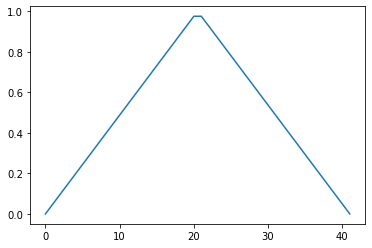

In [15]:
# 窗函数（window function）是信号处理领域常用的数学函数，
#相关应用包括谱分析和滤波器设计等
# 绘制巴特利特窗,是一种三角形平滑窗
window = np.bartlett(42)
plt.plot(window) 
plt.show()

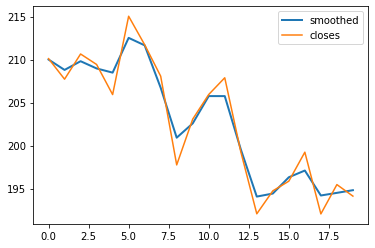

In [16]:
# 布莱克曼窗形式上为三项余弦值的加和
# 该函数唯一的参数为输出点的数量。如果数量为0或小于0，则返回一个空数组。
N = 5
window = np.blackman(N) 
smoothed = np.convolve(window/window.sum(), closes, mode='same')
plt.plot(smoothed[N:-N], lw=2, label="smoothed") 
plt.plot(closes[N:-N], label="closes") 
plt.legend(loc='best') 
plt.show()

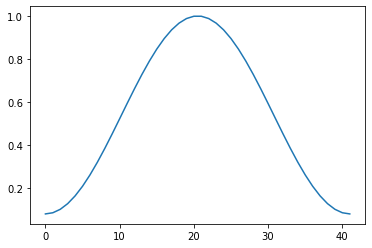

In [17]:
# 汉明窗（Hamming window）形式上是一个加权的余弦函数
# hamming函数返回汉明窗。该函数唯一的参数为输出点的数量。
# 如果数量为0或小于0，则返回一个空数组。
window = np.hamming(42)
plt.plot(window)

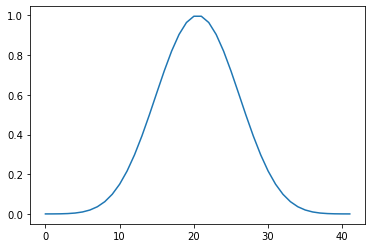

In [20]:
# 凯泽窗
# kaiser函数返回凯泽窗。
# 该函数的第一个参数为输出点的数量。
# 如果数量为0或小于0，则返回一个空数组。第二个参数为β值。
window = np.kaiser(42, 14)
plt.plot(window)

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

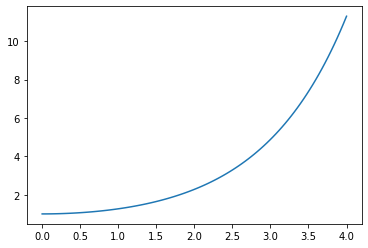

In [25]:
# 绘制修正的贝塞尔函数
# 在NumPy中，以i0 表示第一类修正的零阶贝塞尔函数

x = np.linspace(0, 4, 100)
vals = np.i0(x)
plt.plot(x, vals)
x

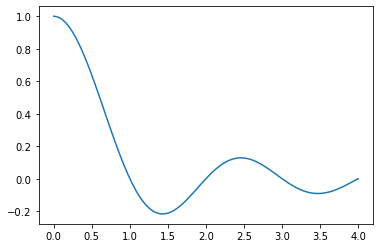

In [27]:
# sinc函数在NumPy中有同名函数sinc，并且该函数也有一个二维版本
x = np.linspace(0, 4, 100)
vals = np.sinc(x)
plt.plot(x, vals) 
plt.show()

(<matplotlib.image.AxesImage at 0x1b357c53a60>,
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.63248648e-03, 3.26497296e-03, ...,
         1.58351189e-01, 1.59983675e-01, 1.61616162e-01],
        [0.00000000e+00, 3.26497296e-03, 6.52994592e-03, ...,
         3.16702377e-01, 3.19967350e-01, 3.23232323e-01],
        ...,
        [0.00000000e+00, 1.58351189e-01, 3.16702377e-01, ...,
         1.53600653e+01, 1.55184165e+01, 1.56767677e+01],
        [0.00000000e+00, 1.59983675e-01, 3.19967350e-01, ...,
         1.55184165e+01, 1.56784002e+01, 1.58383838e+01],
        [0.00000000e+00, 1.61616162e-01, 3.23232323e-01, ...,
         1.56767677e+01, 1.58383838e+01, 1.60000000e+01]]))

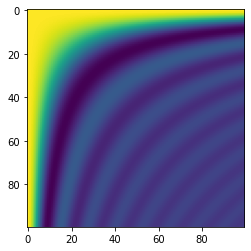

In [34]:
# 二维版本
x = np.linspace(0, 4, 100) 
xx = np.outer(x, x) 
vals = np.sinc(xx) 
plt.imshow(vals), xx